# Проект 9 создание модели для предсказания коефициента восстановления золота из золотосодержащей руды

#### Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# 1. Подготовка данных

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import cross_val_score

In [123]:
train_data = pd.read_csv('/datasets/gold_recovery_train.csv')
test = pd.read_csv('/datasets/gold_recovery_test.csv')
full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [124]:
#train_data.info()

In [125]:
#test.info()

In [126]:
train = train_data.dropna().reset_index(drop = True)

In [127]:
features_train = train.drop(['date','rougher.output.recovery'] , axis=1)
target_train = train['rougher.output.recovery']

# MAE для ручного подсчёта:

In [128]:
def manual_recovery(data):
    c = data['rougher.output.concentrate_au']
    f = data['rougher.input.feed_au']
    t = data['rougher.output.tail_au']
    numerator = c*(f-t)
    divider = f*(c-t)
    recovery = numerator/divider
    return recovery*100
train['manual_recovery'] = train.apply(manual_recovery, axis=1)

In [129]:
def mae(target, predictions):
    total_error = 0
    for i in range(target.shape[0]):
        error = np.abs(target[i]-predictions[i])
        total_error =np.sum(error)
    return total_error / target.shape[0]

In [130]:
print('MAE =',mae(train['manual_recovery'],train['rougher.output.recovery']))
print('Среднее =',train['rougher.output.recovery'].mean())

MAE = 2.5798047953530004e-18
Среднее = 82.7418884610155


MAE очень низкий, по сравнению со средним значением.

In [131]:
columns_test = test.columns
columns_train = train_data.columns
delited_columns_test = []
for i in range(len(columns_train)):
    if columns_train[i] not in columns_test:
        delited_column = columns_train[i]
        delited_columns_test.append(delited_column)
        #print(columns_train[i])
delited_columns_test

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

# 2. Анализ данных

In [132]:
# IQR = Q 3 - Q 1
#Q1-3*IQR до Q3+3*IQR
# Сделаем функцию для создания графиков:

def print_hist(data,columns):
    median = data[columns].median()
    Q1 = data.loc[data[columns]<median][columns].median()
    Q3 = data.loc[data[columns]>median][columns].median()
    IQR = Q3-Q1
    data[columns].hist(bins=30,range=(Q1-3*IQR, Q3+3*IQR )) #label='label'
    plt.show()

# 2.1 Как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки:

# concentrate_ag

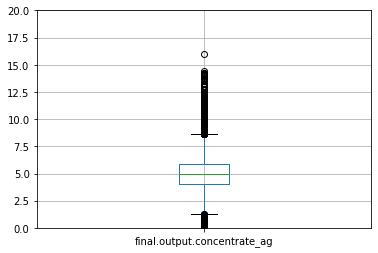

In [133]:
final_output_concentrate_ag = full['final.output.concentrate_ag']
frame_final_output_concentrate_ag = final_output_concentrate_ag.to_frame()

plt.ylim(0, 20)
frame_final_output_concentrate_ag.boxplot()

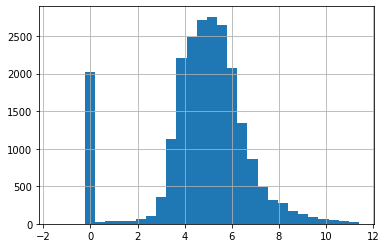

In [134]:
print_hist(full,'final.output.concentrate_ag')

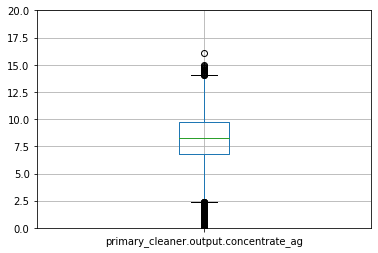

In [135]:
primary_cleaner_output_concentrate_ag = full['primary_cleaner.output.concentrate_ag']
frame_primary_cleaner_output_concentrate_ag = primary_cleaner_output_concentrate_ag.to_frame()

plt.ylim(0, 20)
frame_primary_cleaner_output_concentrate_ag.boxplot()

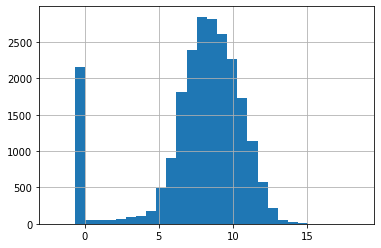

In [136]:
print_hist(full,'primary_cleaner.output.concentrate_ag')

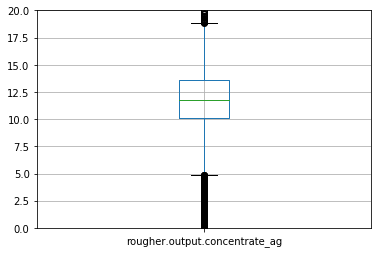

In [137]:
rougher_output_concentrate_ag = full['rougher.output.concentrate_ag']
frame_rougher_output_concentrate_ag = rougher_output_concentrate_ag.to_frame()

plt.ylim(0, 20)
frame_rougher_output_concentrate_ag.boxplot()

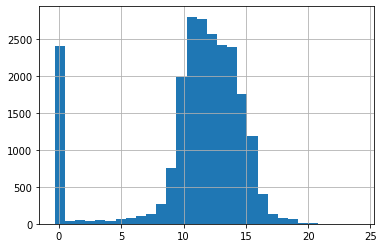

In [138]:
print_hist(full,'rougher.output.concentrate_ag')

# concentrate_au

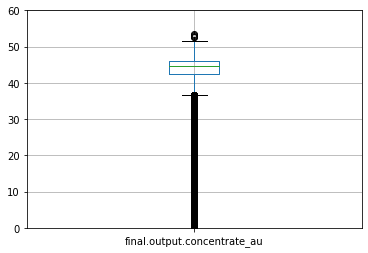

In [139]:
final_output_concentrate_au = full['final.output.concentrate_au']
frame_final_output_concentrate_au = final_output_concentrate_au.to_frame()

plt.ylim(0, 60)
frame_final_output_concentrate_au.boxplot()

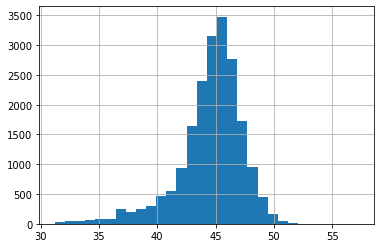

In [140]:
print_hist(full,'final.output.concentrate_au')

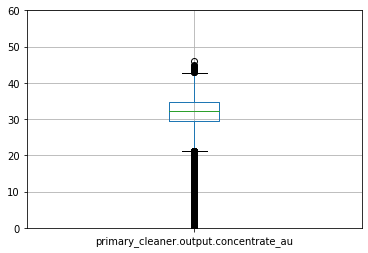

In [141]:
primary_cleaner_output_concentrate_au = full['primary_cleaner.output.concentrate_au']
frame_primary_cleaner_output_concentrate_au = primary_cleaner_output_concentrate_au.to_frame()

plt.ylim(0, 60)
frame_primary_cleaner_output_concentrate_au.boxplot()

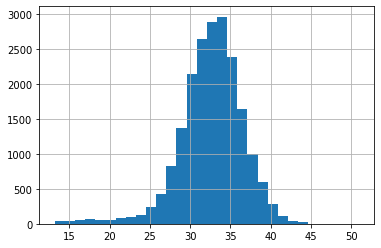

In [142]:
print_hist(full,'primary_cleaner.output.concentrate_au')

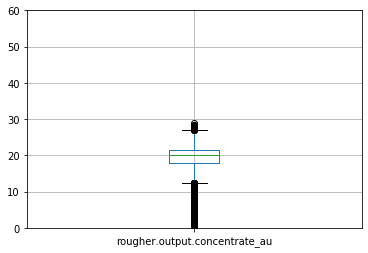

In [143]:
rougher_output_concentrate_au = full['rougher.output.concentrate_au']
frame_rougher_output_concentrate_au = rougher_output_concentrate_au.to_frame()

plt.ylim(0, 60)
frame_rougher_output_concentrate_au.boxplot()

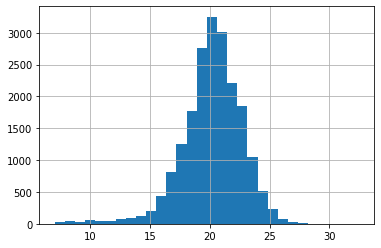

In [144]:
print_hist(full,'rougher.output.concentrate_au')

# concentrate_pb

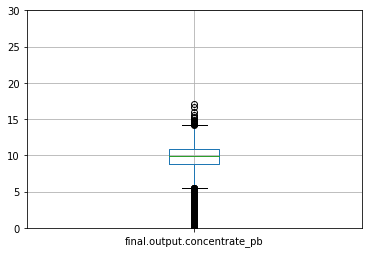

In [145]:
final_output_concentrate_pb = full['final.output.concentrate_pb']
frame_final_output_concentrate_pb = final_output_concentrate_pb.to_frame()

plt.ylim(0, 30)
frame_final_output_concentrate_pb.boxplot()

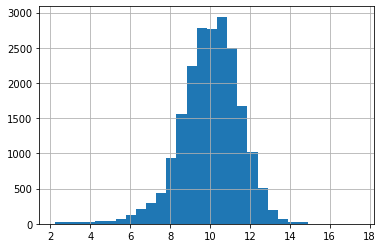

In [146]:
print_hist(full,'final.output.concentrate_pb')

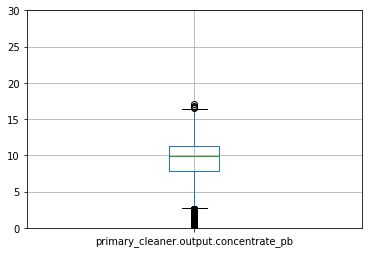

In [147]:
primary_cleaner_output_concentrate_pb = full['primary_cleaner.output.concentrate_pb']
frame_primary_cleaner_output_concentrate_pb = primary_cleaner_output_concentrate_pb.to_frame()

plt.ylim(0, 30)
frame_primary_cleaner_output_concentrate_pb.boxplot()

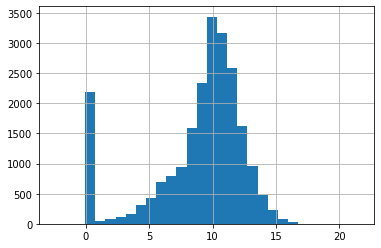

In [148]:
print_hist(full,'primary_cleaner.output.concentrate_pb')

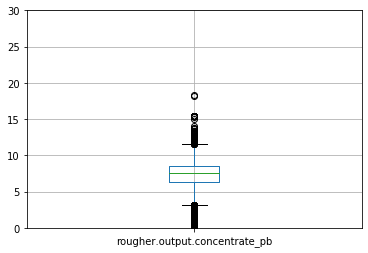

In [149]:
rougher_output_concentrate_pb = full['rougher.output.concentrate_pb']
frame_rougher_output_concentrate_pb = rougher_output_concentrate_pb.to_frame()

plt.ylim(0, 30)
frame_rougher_output_concentrate_pb.boxplot()

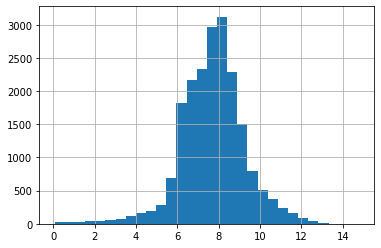

In [150]:
print_hist(full,'rougher.output.concentrate_pb')

Вывод: самое важное для золотодобывающей компании было - получить как можно больший концентрат золота в руде - каждый этап обработки - повышает концентрацию золота.

# 2.2 Распределение размеров гранул сырья на обучающей и тестовой выборках

# На обучающей выборке:

count    16443.000000
mean        58.676444
std         23.922591
min          9.659576
25%         47.575879
50%         54.104257
75%         65.051064
max        484.967466
Name: rougher.input.feed_size, dtype: float64

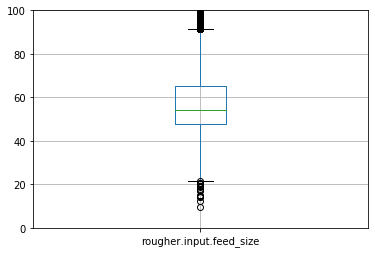

In [151]:
train_rougher_input_feed_size = train_data['rougher.input.feed_size']
train_frame_rougher_input_feed_size = train_rougher_input_feed_size.to_frame()

plt.ylim(0, 100)
train_frame_rougher_input_feed_size.boxplot()
train_data['rougher.input.feed_size'].describe()

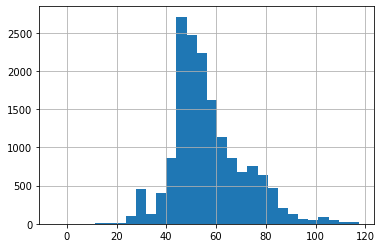

In [152]:
print_hist(train_data,'rougher.input.feed_size')

count    16860.000000
mean         7.297285
std          0.619166
min          1.080000
25%          6.940000
50%          7.285000
75%          7.700000
max         10.470000
Name: primary_cleaner.input.feed_size, dtype: float64

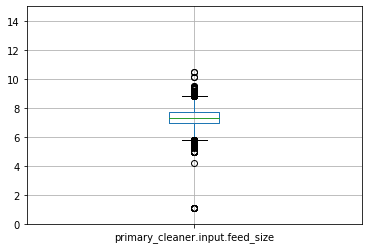

In [153]:
train_primary_cleaner_input_feed_size = train_data['primary_cleaner.input.feed_size']
train_frame_primary_cleaner_input_feed_size = train_primary_cleaner_input_feed_size.to_frame()

plt.ylim(0, 15)
train_frame_primary_cleaner_input_feed_size.boxplot()
train_data['primary_cleaner.input.feed_size'].describe()

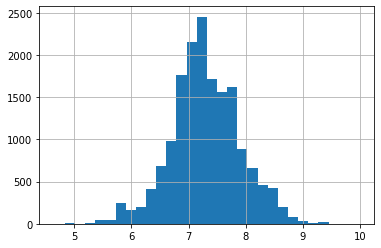

In [154]:
print_hist(train_data,'primary_cleaner.input.feed_size')

# На тестовой выборке:

count    5834.000000
mean       55.937535
std        22.724254
min         0.046369
25%        43.890852
50%        50.002004
75%        61.638434
max       477.445473
Name: rougher.input.feed_size, dtype: float64

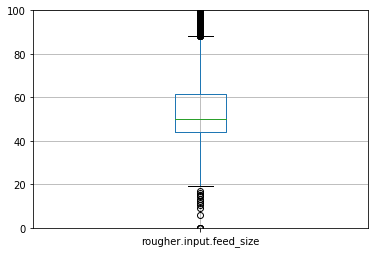

In [155]:
test_rougher_input_feed_size = test['rougher.input.feed_size']
test_frame_rougher_input_feed_size = test_rougher_input_feed_size.to_frame()

plt.ylim(0, 100)
test_frame_rougher_input_feed_size.boxplot()
test['rougher.input.feed_size'].describe()

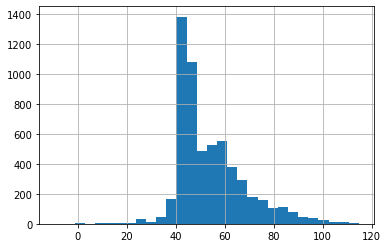

In [156]:
print_hist(test,'rougher.input.feed_size')

count    5856.000000
mean        7.264651
std         0.611526
min         5.650000
25%         6.885625
50%         7.259333
75%         7.650000
max        15.500000
Name: primary_cleaner.input.feed_size, dtype: float64

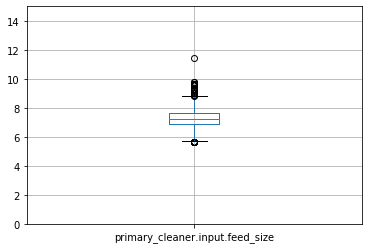

In [157]:
test_primary_cleaner_input_feed_size = test['primary_cleaner.input.feed_size']
test_frame_primary_cleaner_input_feed_size = test_primary_cleaner_input_feed_size.to_frame()

plt.ylim(0, 15)
test_frame_primary_cleaner_input_feed_size.boxplot()
test['primary_cleaner.input.feed_size'].describe()

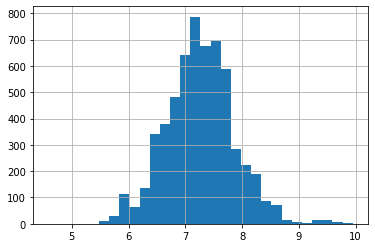

In [158]:
print_hist(test,'primary_cleaner.input.feed_size')

Вывод: Распределение различается, но не существенным образом.

# 2.3 Суммарная концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

# Концентрация в сырье:

In [159]:
def add_feed_total_concentrate(data):
    feed_ag = data['rougher.input.feed_ag']
    feed_pb = data['rougher.input.feed_pb']
    feed_sol = data['rougher.input.feed_sol']
    feed_au = data['rougher.input.feed_au']
    total_concentrate = feed_ag + feed_pb + feed_sol + feed_au
    return total_concentrate
full['feed_total_concentrate'] = full.apply(add_feed_total_concentrate, axis=1)

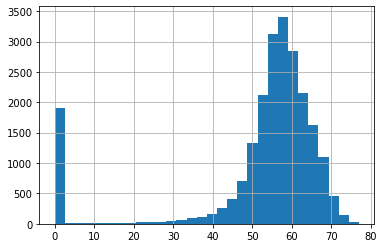

In [160]:
full['feed_total_concentrate'].hist(bins=30) #label='label'
plt.show()
# Гистаграмма всех значений

# В черновом концентрате:

In [161]:
def add_rougher_output_total_concentrate(data):
    feed_ag = data['rougher.output.concentrate_ag']
    feed_pb = data['rougher.output.concentrate_pb']
    feed_sol = data['rougher.output.concentrate_sol']
    feed_au = data['rougher.output.concentrate_au']
    total_concentrate = feed_ag + feed_pb + feed_sol + feed_au
    return total_concentrate
full['rougher_output_total_concentrate'] = full.apply(add_rougher_output_total_concentrate, axis=1)

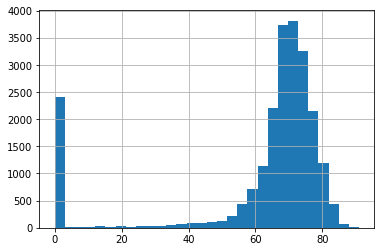

In [162]:
full['rougher_output_total_concentrate'].hist(bins=30) #label='label'
plt.show()

# Финальный концентрат:

In [163]:
def add_final_output_total_concentrate(data):
    feed_ag = data['final.output.concentrate_ag']
    feed_pb = data['final.output.concentrate_pb']
    feed_sol = data['final.output.concentrate_sol']
    feed_au = data['final.output.concentrate_au']
    total_concentrate = feed_ag + feed_pb + feed_sol + feed_au
    return total_concentrate
full['final_output_total_concentrate'] = full.apply(add_final_output_total_concentrate, axis=1)

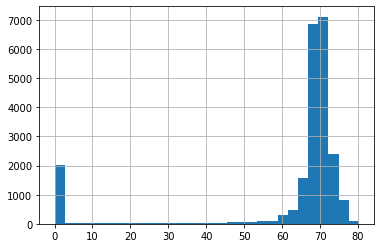

In [164]:
full['final_output_total_concentrate'].hist(bins=30) #label='label'
plt.show()

Бывает очень бедная руда, в которой отсуствует золото и другие полезные в промышленности металлы.

В такой бедной руде концентрация таких металлов может достигать нуля. Поэтому я считаю, что нуль это не аномальное, а нормальное значение.

Однако, переосмыслив цель нашей работы - это именно построения модели, которая расчитывает эффективность обогащения - нам не нужно считать обогащение руды, в которой нечего обогащать, так как она бедная, поэтому избавимся от этой руды:

In [165]:
null_feed_total_concentrate = full.loc[full['feed_total_concentrate'] ==0]
null_rougher_output_total_concentrate = full.loc[full['rougher_output_total_concentrate'] ==0]
null_final_output_total_concentrate = full.loc[full['final_output_total_concentrate'] ==0]

In [166]:
have_feed_total_concentrate = full.query('@full.index not in @null_feed_total_concentrate.index')

have_rougher_output_total_concentrate = have_feed_total_concentrate.query('@have_feed_total_concentrate.index not in @null_rougher_output_total_concentrate.index')

have_final_output_total_concentrate = have_rougher_output_total_concentrate.query('@have_rougher_output_total_concentrate.index not in @null_final_output_total_concentrate.index')

# 3. Модель

In [167]:
def return_sMAPE(target, predictions):
    predictions0 = pd.Series(predictions)
    total_result = 0
    for i in range(target.shape[0]):
        numerator = np.abs(target-predictions)
        denominator = (np.abs(target) + np.abs(predictions))/2
        result = numerator/denominator*100
        total_result = np.sum(result)
    return total_result / target.shape[0]

In [168]:
test_data = have_final_output_total_concentrate.dropna().reset_index(drop = True)

train = train.drop(['manual_recovery'], axis='columns')

test_data = test_data.drop(['final_output_total_concentrate', 'rougher_output_total_concentrate', 'feed_total_concentrate'], axis='columns')

In [169]:
features_train0= train.drop(['date','rougher.output.recovery'] , axis=1)
target_train0= train['rougher.output.recovery']
features_valid0 = test_data.drop(['date','rougher.output.recovery'] , axis=1)
target0 = test_data['rougher.output.recovery']

features_train1 = train.drop(['date','final.output.recovery'] , axis=1)
target_train1 = train['final.output.recovery']
features_valid1=test_data.drop(['date','final.output.recovery'] , axis=1)
target1=test_data['final.output.recovery']

In [170]:
#test_data.info()

In [171]:
#train.info()

# Модель случайного леса:

In [191]:
for forest in range(10, 31, 10):
    for depth in range(5, 31, 5):
        model_rougher_output_recovery = RandomForestRegressor(n_estimators=forest, max_depth=depth, random_state=0)
        model_rougher_output_recovery.fit(features_train0, target_train0)
        predictions_rougher_output_recovery = model_rougher_output_recovery.predict(features_valid0)
        sMAPE_rougher = return_sMAPE(target0, predictions_rougher_output_recovery)

        model_final_output_recovery = RandomForestRegressor(n_estimators=forest, max_depth=depth, random_state=0)
        model_final_output_recovery.fit(features_train1, target_train1)
        predictions_final_output_recovery = model_final_output_recovery.predict(features_valid1)
        sMAPE_final = return_sMAPE(target1, predictions_final_output_recovery)

        result_sMAPE = sMAPE_rougher*0.25 + sMAPE_final*0.75
        print('Итоговое sMAPE =', result_sMAPE,': n_estimators =',forest,'max_depth =',depth)

Итоговое sMAPE = 5.105141855493814 : n_estimators = 10 max_depth = 5
Итоговое sMAPE = 3.0294834775443307 : n_estimators = 10 max_depth = 10
Итоговое sMAPE = 2.696715509968569 : n_estimators = 10 max_depth = 15
Итоговое sMAPE = 2.6429885977558945 : n_estimators = 10 max_depth = 20
Итоговое sMAPE = 2.664359589549706 : n_estimators = 10 max_depth = 25
Итоговое sMAPE = 2.66103915117126 : n_estimators = 10 max_depth = 30
Итоговое sMAPE = 5.146736010805455 : n_estimators = 20 max_depth = 5
Итоговое sMAPE = 3.0810696797372894 : n_estimators = 20 max_depth = 10
Итоговое sMAPE = 2.763777639841072 : n_estimators = 20 max_depth = 15
Итоговое sMAPE = 2.7123339892449154 : n_estimators = 20 max_depth = 20
Итоговое sMAPE = 2.7292251086236967 : n_estimators = 20 max_depth = 25
Итоговое sMAPE = 2.713419434180474 : n_estimators = 20 max_depth = 30
Итоговое sMAPE = 5.159833350109997 : n_estimators = 30 max_depth = 5
Итоговое sMAPE = 3.1723866047741036 : n_estimators = 30 max_depth = 10
Итоговое sMAPE = 2

In [192]:
LinearRegressionmodel_rougher_output_recovery = LinearRegression()
LinearRegressionmodel_rougher_output_recovery.fit(features_train0, target_train0)
predictions_LinearRegressionmodel_rougher_output_recovery = LinearRegressionmodel_rougher_output_recovery.predict(features_valid0)
sMAPE_rougher = return_sMAPE(target0, predictions_LinearRegressionmodel_rougher_output_recovery)

LinearRegressionmodel_final_output_recovery = RandomForestRegressor(n_estimators=forest, max_depth=depth, random_state=0)
LinearRegressionmodel_final_output_recovery.fit(features_train1, target_train1)
predictions_LinearRegressionmodel_final_output_recovery = LinearRegressionmodel_final_output_recovery.predict(features_valid1)
sMAPE_final = return_sMAPE(target1, predictions_LinearRegressionmodel_final_output_recovery)

result_sMAPE = sMAPE_rougher*0.25 + sMAPE_final*0.75
print('Итоговое sMAPE =', result_sMAPE)

Итоговое sMAPE = 3.204626634919776


Вывод: лучшая модель случайный лес с гиперпараметрами n_estimators = 10 max_depth = 20, проверим её на тестовой выборке:

In [186]:
train_for_test = train.drop(delited_columns_test , axis=1)

test.index = test['date']
full.index = full['date']

test['rougher.output.recovery'] = full['rougher.output.recovery']
test['final.output.recovery'] = full['final.output.recovery']
test = test.dropna().reset_index(drop = True)
full = full.reset_index(drop = True)

In [187]:
features_train01= train_for_test.drop(['date'], axis=1)
target_train01= train['rougher.output.recovery']

features_valid01 = test.drop(['date','rougher.output.recovery','final.output.recovery'], axis=1)
target01 = test['rougher.output.recovery']


features_train10 = train_for_test.drop(['date'] , axis=1)
target_train10 = train['final.output.recovery']

features_valid10 = test.drop(['date','rougher.output.recovery','final.output.recovery'], axis=1)
target10 = test['final.output.recovery']

In [193]:
model_rougher_output_recovery = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=0)
model_rougher_output_recovery.fit(features_train01, target_train01)
predictions_rougher_output_recovery = model_rougher_output_recovery.predict(features_valid01)
sMAPE_rougher = return_sMAPE(target01, predictions_rougher_output_recovery)

model_final_output_recovery = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=0)
model_final_output_recovery.fit(features_train10, target_train10)
predictions_final_output_recovery = model_final_output_recovery.predict(features_valid10)
sMAPE_final = return_sMAPE(target10, predictions_final_output_recovery)

result_sMAPE = sMAPE_rougher*0.25 + sMAPE_final*0.75
print('Итоговое sMAPE =', result_sMAPE)

Итоговое sMAPE = 8.07846292498293


# Кросс-валидация

In [178]:
scores = []

# зададим размер блока, если их всего три
sample_size = int(len(test_data)/3)

for i in range(0, len(test_data), sample_size):
    next_index = i+int(len(test_data)/sample_size)
    valid = test_data[i:next_index]
    train = test_data.query('@test_data.index not in @valid.index')
    
# разбейте переменные features и target на выборки features_train, target_train, features_valid, target_valid    
    features_train0= train.drop(['date','rougher.output.recovery'] , axis=1)
    target_train0= train['rougher.output.recovery']
    features_valid0 = valid.drop(['date','rougher.output.recovery'] , axis=1)
    target0 = valid['rougher.output.recovery']

    features_train1 = train.drop(['date','final.output.recovery'] , axis=1)
    target_train1 = train['final.output.recovery']
    features_valid1=valid.drop(['date','final.output.recovery'] , axis=1)
    target1=valid['final.output.recovery']

    model_rougher_output_recovery = RandomForestRegressor(n_estimators=10, max_depth=10, random_state=0)
    model_rougher_output_recovery.fit(features_train0, target_train0)
    predictions_rougher_output_recovery = model_rougher_output_recovery.predict(features_valid0)
    sMAPE_rougher = return_sMAPE(target0, predictions_rougher_output_recovery)

    model_final_output_recovery = RandomForestRegressor(n_estimators=10, max_depth=10, random_state=0)
    model_final_output_recovery.fit(features_train1, target_train1)
    predictions_final_output_recovery = model_final_output_recovery.predict(features_valid1)
    sMAPE_final = return_sMAPE(target1, predictions_final_output_recovery)
    score = sMAPE_rougher*0.25 + sMAPE_final*0.75
    scores.append(score)
    
scores = pd.Series(scores)
final_score = scores.mean()

In [181]:
print('Средняя оценка качества модели:', final_score)

Средняя оценка качества модели: 2.841686544567633


# Простой метод предсказания, без методов машинного обучения:

In [180]:
target_pred_constant0 = pd.Series(test_data['rougher.output.recovery'].mean(),index=target0.index)
sMAPE_rougher0 = return_sMAPE(target0, target_pred_constant0)
target_pred_constant1 = pd.Series(test_data['final.output.recovery'].mean(),index=target1.index)
sMAPE_final0 = return_sMAPE(target1, target_pred_constant1)
scores0 = sMAPE_rougher0*0.25 + sMAPE_final0*0.75

print(scores0)

8.161878795136197


Вывод:

Мы провели обширный анализ данных, создали новую метрику эффеткивности sMAPE, которую создали в виде функции и затем применяли как метрику для проверки адекватности работы моделей машинного обучения, чтобы выбрать лучшую модель.

В тестовую выборку мы подтянули данные таргета из фулл данных, чтобы данные подтянулись корректно мы за индекс временно приняли строчку date, а затем ресетнули индексы за ненадобностью. В итоге у нас получилось рассчитать sMAPE и на тестовой выборке.

кросс валидация была написанна в ручную, так как функция cross-val-score - использует в качестве метрики не функцию sMAPE, а другую метрику.

Так же мы проверили проверку адекватности модели - модель предсказывает значение лучше, чем простой метод без машинного обучения.

#### комментирий по кросс-валидации

<span style="color:purple"> Но это вроде есть в sklearne:) Ты даже импортнул cross-val-score) </span>

<span style="color:green"> Круто, что можешь сделать ручками кросс-валидацию. Это полезно понимать, как оно внутри работает) </span>

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html
    
<span style="color:purple"> Смотри, sklearn на то и очень популярен, что много чего кастомного можно сделать поверх него или при участии его функwий) Например свою функцию оценки)  Ссылка выше, нужно будет лишь передать в сам cross-val-score</span>